In [1]:
import pandas as pd # Pandas is an open source library providing data structures and data analysis tools for Python
import re #regex
from functools import reduce 
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
import urllib.request
import json
from datetime import date
from datetime import datetime

In [7]:
today = 'jan'
beta_file_loc =  "C:/Users/huixin/OneDrive - UC San Diego/menoplan/pilot_phase/merged_analysis/"
pilot_file_loc = "C:/Users/huixin/OneDrive - UC San Diego/menoplan/trial_phase/"

cleaned = pd.read_csv(pilot_file_loc + "cleaned_data/p2/cleaned" + today  + "_p2.csv")
cleaned  = cleaned[cleaned["I-Information_4_p2"].str.contains("Hui Xin")==False]

allD = pd.read_csv(pilot_file_loc+"cleaned_data/allData"+ today+ ".csv")
allD = allD.drop_duplicates()

noFraud = pd.read_csv(pilot_file_loc+"cleaned_data/noFraud/noFraud"+ today+ ".csv")

print('Total survey 1 ane 2 attempts: ', len(allD))
print('Total Unique participants: ', allD['IPAddress_p2'].nunique())
print('Total survey 2 attempts: ', len(cleaned))
print('Total Unique participants: ', cleaned['IPAddress_p2'].nunique())

print('Total survey 1 and 2 no fraud attempts: ', len(noFraud))
print('Total Unique participants: ', noFraud['IPAddress_p2'].nunique())

Total survey 1 ane 2 attempts:  737
Total Unique participants:  733
Total survey 2 attempts:  736
Total Unique participants:  733
Total survey 1 and 2 no fraud attempts:  218
Total Unique participants:  218


In [3]:
pd.DataFrame(allD.isna().sum()/len(allD)).to_csv('percentageNA.csv')

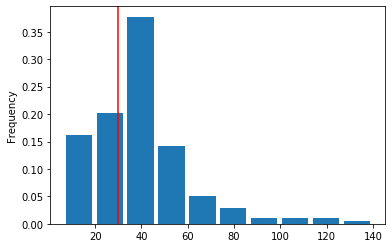

In [4]:
a = allD[allD['durationMins_p2'] < 150]['durationMins_p2']
a.plot.hist(weights = np.ones_like(a.index) / len(a.index), bins=10, rwidth=0.85)
plt.axvline(x=30, color='r', linestyle='-')
plt.show()



In [12]:
list(allD.columns)

['StartDate_p1',
 'EndDate_p1',
 'Status_p1',
 'IPAddress_p1',
 'Progress_p1',
 'durationMins_p1',
 'Finished_p1',
 'RecordedDate_p1',
 'ResponseId_p1',
 'RecipientLastName_p1',
 'RecipientFirstName_p1',
 'RecipientEmail_p1',
 'ExternalReference_p1',
 'LocationLatitude_p1',
 'LocationLongitude_p1',
 'DistributionChannel_p1',
 'UserLanguage_p1',
 'Q_RecaptchaScore_p1',
 'Q_RelevantIDDuplicate_p1',
 'Q_RelevantIDDuplicateScore_p1',
 'Q_RelevantIDFraudScore_p1',
 'Q_RelevantIDLastStartDate_p1',
 'Q15_p1',
 'IS1_p1',
 'SQ1_p1',
 'SQ2_p1',
 'SQ3_p1',
 'SQ4_p1',
 'BrowserInfo_Browser_p1',
 'BrowserInfo_Version_p1',
 'BrowserInfo_Operating System_p1',
 'BrowserInfo_Resolution_p1',
 'Email_p1',
 'Email2_p1',
 'QCity_ExportTag_p1',
 'QState_ExportTag_p1',
 'Referer_p1',
 'cityName_p1',
 'Q_URL_p1',
 'Q_BallotBoxStuffing_p1',
 'Q17_Browser_p1',
 'Q17_Version_p1',
 'Q17_Operating System_p1',
 'Q17_Resolution_p1',
 'countryName_p1',
 'EmailMerge',
 'Cond_p2',
 'DistributionChannel_p2',
 'Educ_p2',

In [17]:
allD['I-Timing_Page Submit_p2']

0       20.100
1        9.038
2       42.019
3       38.192
4       26.671
        ...   
732     20.028
733     85.041
734    204.571
735      9.578
736     61.909
Name: I-Timing_Page Submit_p2, Length: 737, dtype: float64

In [10]:
# ls = []
# for i in (range(1, 8)):
#     ls.append('I'+ str(i) + '-Literacy_p2')
# ls = list(ls)
# qualityC = noFraud[ls][noFraud['Cond_p2'] == 'Ctrl'].mean(axis = 1).mean()
# qualityE = noFraud[ls][noFraud['Cond_p2'] == 'Exp'].mean(axis = 1).mean()
# print(qualityC, qualityE)
